In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from matplotlib import pylab
from scipy import stats
from sklearn import datasets, linear_model

In [3]:
df = pd.read_csv('winemag-data_first150k.csv')

In [4]:
list(df)

['Unnamed: 0',
 'country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'variety',
 'winery']

In [5]:
## remove NaNs
gdf = df.dropna(how='any', axis='rows', subset=['price'], inplace=False)

In [6]:
##parsing out price and point column and grouped them by country

country_pp = gdf.groupby('country').aggregate(np.mean)
rating = country_pp['points']
cost = country_pp['price']

gdf2 = gdf.set_index('country', inplace=False)
us_cost=gdf2.loc[['US'],['price']]
us_summ = us_cost['price']

In [7]:
##equation for line of best fit -- obtained from 
###"https://stackoverflow.com/questions/22239691/code-for-line-of-best-fit-of-a-scatter-plot-in-python"

def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

In [8]:
# solution
a, b = best_fit(cost, rating)
##best fit line:
##y = 82.88 + 0.14x

best fit line:
y = 82.88 + 0.14x


To see whether the cost of wine is correlated with its taste (assumed by a high WineEnthusiast rating), we can plot the rating vs the average cost. This scatter plot shows a positive correlation between rating and cost, indicating the better the taste, the higher the cost. However, because this data is based only on WineEnthusiast rating, this conclusion is not completely accurate. In order to fix this problem, we could include ratings from other wine critics. 

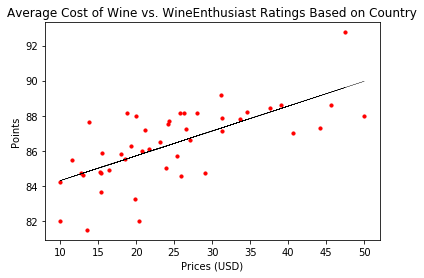

In [9]:
##Scatter plot of price vs points
plt.scatter(
    x=country_pp['price'],
    y=country_pp['points'],
    color='red',
    marker='o', s=10
)
plt.ylabel('Points')
plt.xlabel('Prices (USD)')
plt.title('Average Cost of Wine vs. WineEnthusiast Ratings Based on Country')

#line of best fit
yfit = [a + b * xi for xi in cost]
plt.plot(cost, yfit, color='black', linewidth='0.25')
plt.show()

### The histogram and boxplot below show the frequency and range of wine prices by country. We see that most wines are priced on the lower end and the boxplot agrees with the narrow spread of prices (between 10-50 USD). 

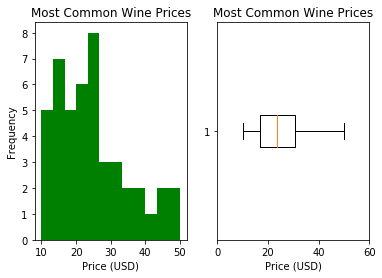

In [10]:
plt.subplot(1, 2, 1)
plt.hist(cost, color='green', bins=12) 
plt.ylabel('Frequency')
plt.xlabel('Price (USD)')
plt.title('Most Common Wine Prices')

plt.subplot(1, 2, 2)
plt.boxplot(cost, vert=False)
plt.xlim(0,60)
plt.xlabel('Price (USD)')
plt.title('Most Common Wine Prices')
plt.show()

The histogram and boxplot below show the frequency and range of WineEnthusiast wine ratings by country. We see that all the wines are rated above 80. Most fall in the mid-80 to low-90 rating. There is one outlier that is very highly rated. 

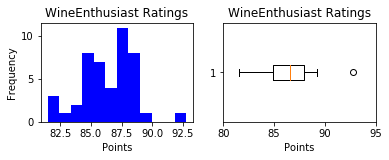

In [11]:
plt.subplot(2, 2, 1)
plt.hist(rating, color='blue', bins=12) 
plt.ylabel('Frequency')
plt.xlabel('Points')
plt.title('WineEnthusiast Ratings')

plt.subplot(2, 2, 2)
plt.boxplot(rating, vert=False)
plt.xlim(80,95)
plt.xlabel('Points')
plt.title('WineEnthusiast Ratings')
plt.show()

In [12]:
## Practice
#gdf.set_index('country', inplace=True)
#us_cost=gdf.loc[['US'],['price']]
#us_summ = us_cost['price']
#plt.boxplot(us_summ)
#plt.show()

In [13]:
un_gdf=gdf['country'].unique()
print(un_gdf)

['US' 'Spain' 'France' 'Italy' 'New Zealand' 'Bulgaria' 'Argentina'
 'Australia' 'Portugal' 'Israel' 'South Africa' 'Greece' 'Chile' 'Morocco'
 'Romania' 'Germany' 'Canada' 'Moldova' 'Hungary' 'Austria' 'Croatia'
 'Slovenia' nan 'India' 'Turkey' 'Macedonia' 'Lebanon' 'Serbia' 'Uruguay'
 'Switzerland' 'Albania' 'Bosnia and Herzegovina' 'Brazil' 'Cyprus'
 'Lithuania' 'Japan' 'China' 'South Korea' 'Ukraine' 'England' 'Mexico'
 'Georgia' 'Montenegro' 'Luxembourg' 'Slovakia' 'Czech Republic'
 'US-France']


###  Based on the boxplots, we see that the range of prices are much larger in European/American countries compared to countries on the Asian and African continent. However, the mean price always falls around 20. 

In [14]:
def summ(country):
    for nam in country:
        print(nam)
        if str(nam) == str('nan'):
            continue
        cost=gdf2.loc[[nam],['price']]
        result=cost['price']
        plt.boxplot(result)
        plt.ylim(-10, 125)
        plt.show()

US


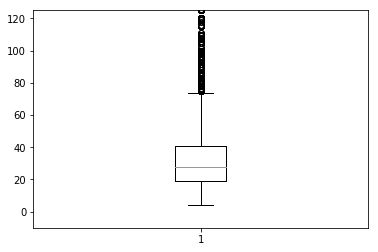

Spain


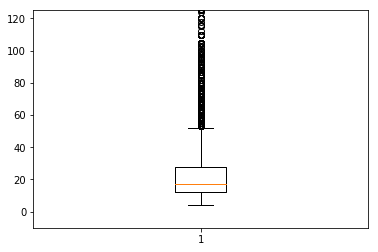

France


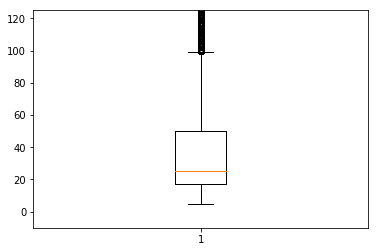

Italy


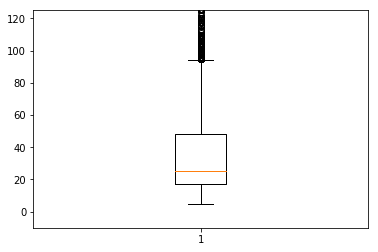

New Zealand


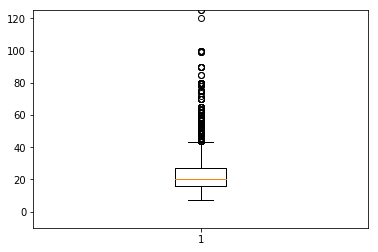

Bulgaria


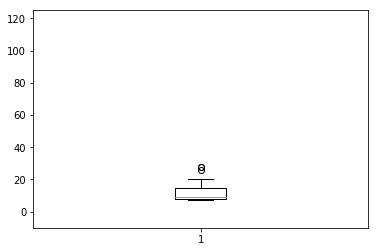

Argentina


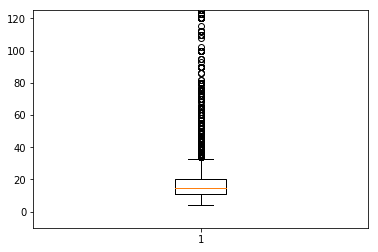

Australia


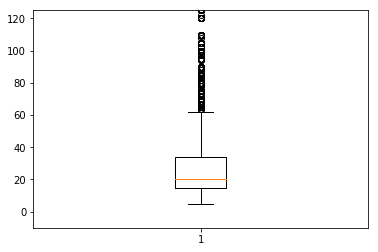

Portugal


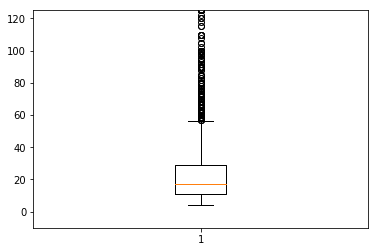

Israel


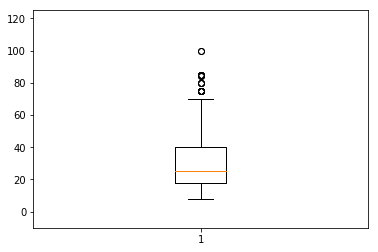

South Africa


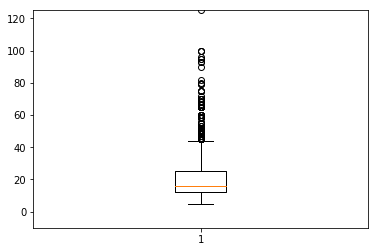

Greece


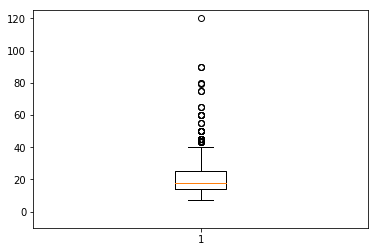

Chile


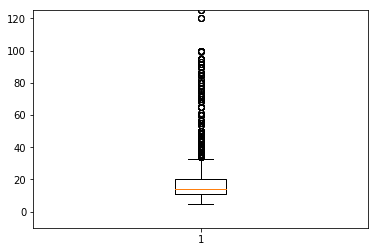

Morocco


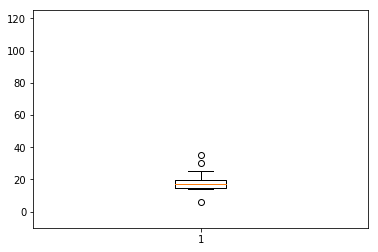

Romania


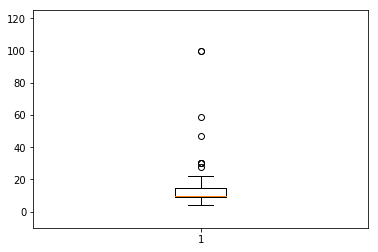

Germany


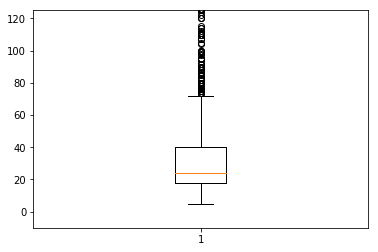

Canada


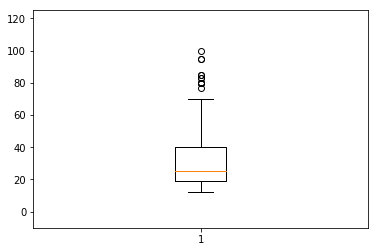

Moldova


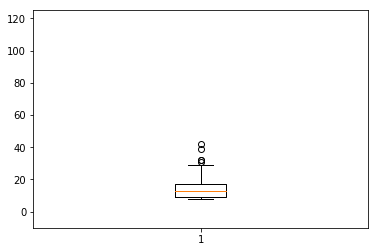

Hungary


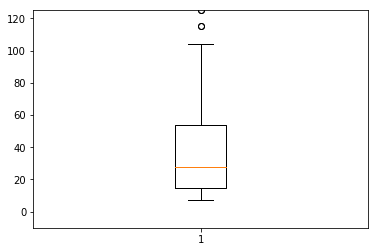

Austria


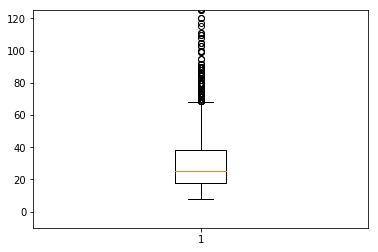

Croatia


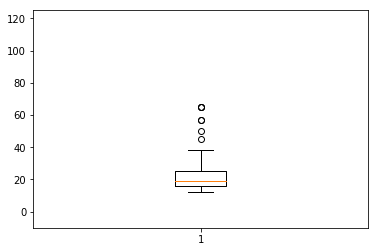

Slovenia


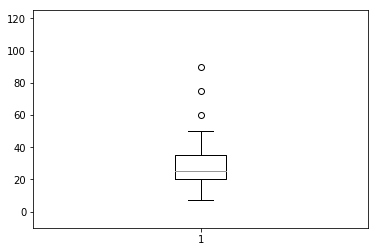

nan
India


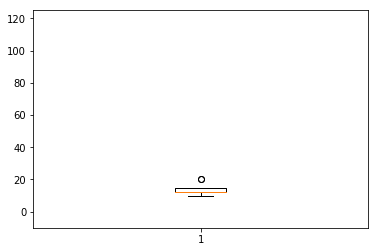

Turkey


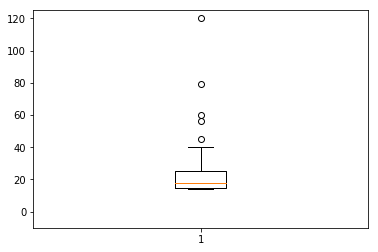

Macedonia


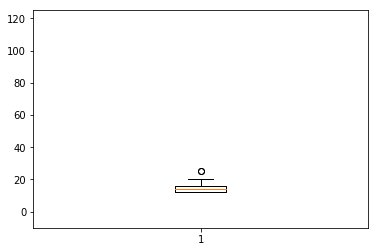

Lebanon


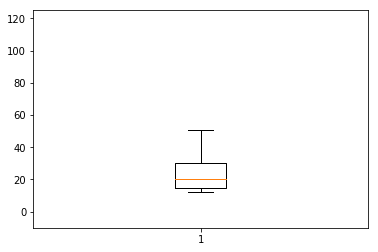

Serbia


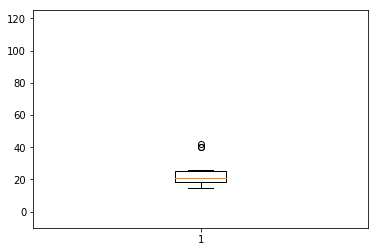

Uruguay


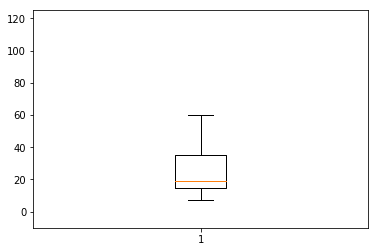

Switzerland


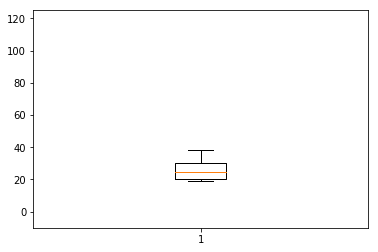

Albania


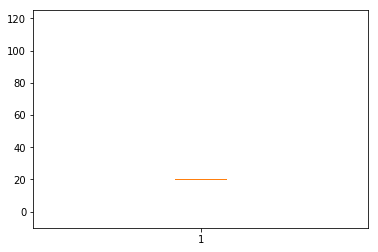

Bosnia and Herzegovina


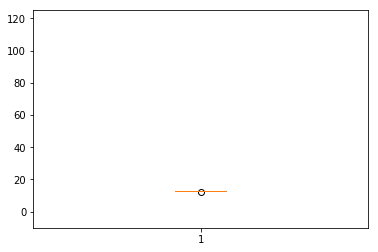

Brazil


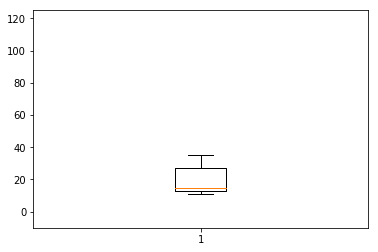

Cyprus


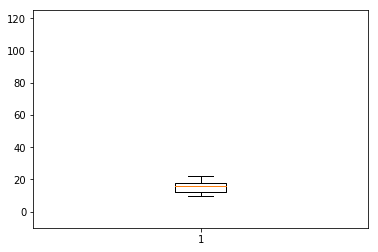

Lithuania


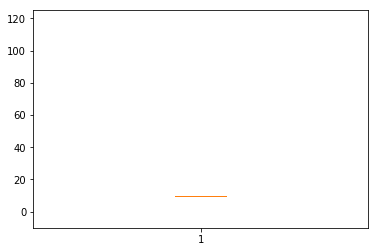

Japan


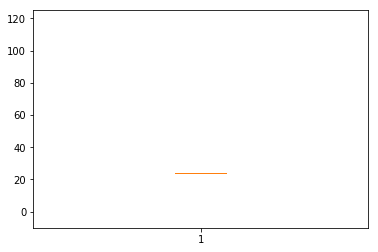

China


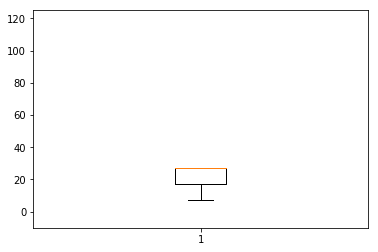

South Korea


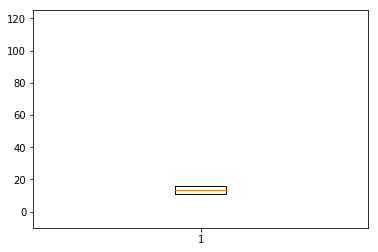

Ukraine


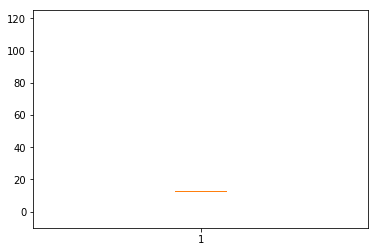

England


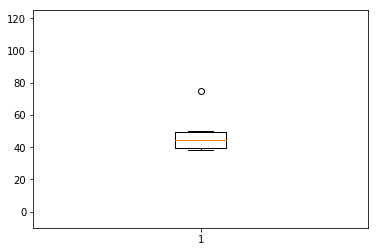

Mexico


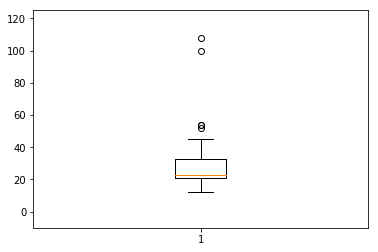

Georgia


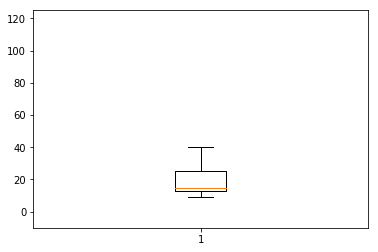

Montenegro


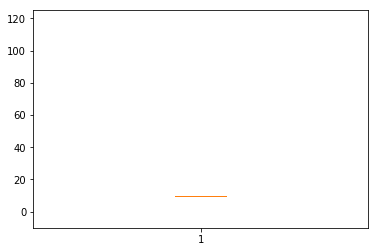

Luxembourg


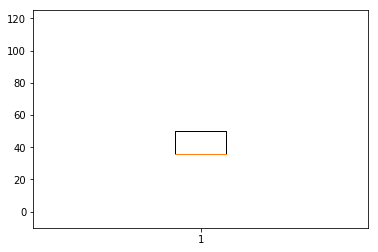

Slovakia


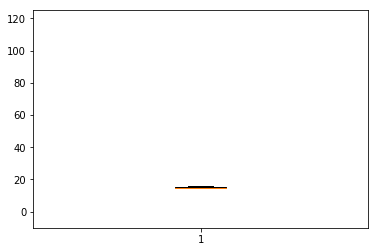

Czech Republic


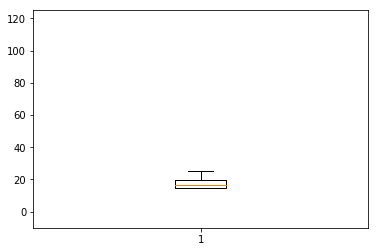

US-France


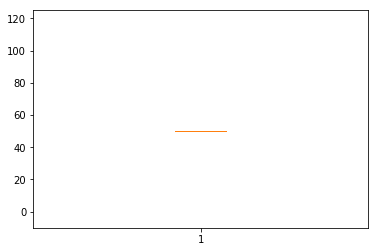

In [15]:
summ(un_gdf)